# Segundo desafio


In [ ]:
nome_do_aluno = 'Gustavo de Oliveira Almeida'  
matricula_do_aluno = 86755 

## Rode a célula a seguir antes de começar!

Ela vai servir para habilitar a função `mostrar()`, importar os pacotes do NumPy e iniciar o gerador de números aleatórios.

Note que `matricula_do_aluno` dever ser um número inteiro, definido acima!

In [ ]:
# importa o pacote numpy:
import numpy as np 

# inicia o gerador de números aleatórios, com a semente igual à matrícula do aluno
rng = np.random.default_rng(matricula_do_aluno)

# funções para plotar
import matplotlib.pyplot as plt
def mostrar(a,imprimir=True,**kwargs):
  if imprimir: print(a)
  if a.ndim > 1:
    fig,ax = plt.subplots(**kwargs)
    cbar = ax.imshow(a, aspect='auto')
    fig.colorbar(cbar)
    plt.show()
  return

def mostrar_potencial(x,y,z,Ex=None,Ey=None):
  WIDTH, HEIGHT, DPI = 500, 500, 100
  fig = plt.figure(figsize=(WIDTH/DPI, HEIGHT/DPI))
  ax = fig.add_subplot()
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

  cmap = plt.get_cmap('OrRd')
  ct = ax.contourf(x,y,z, cmap=cmap)
  fig.colorbar(ct)

  if type(Ex) != type(None) and type(Ey) != type(None):
    color = np.log(np.sqrt(Ex**2 + Ey**2))
    ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.plasma,
                  density=3, arrowstyle='->')

---
## Problema 1

Considere uma superfície de tamanho $5 \times 10$ unidades.



### Item (a)

Esta `ndarray` irá representar a existência ou não de partículas em cada unidade. De que tipo ela deve ser? (*Dica: qual `dtype` retorna apenas valores binários?*)

Crie uma `ndarray` inicialmente vazia (com zeros) com o tamanho dito e o `dtype` correto e utilize a função `mostrar()` para mostrá-la.

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


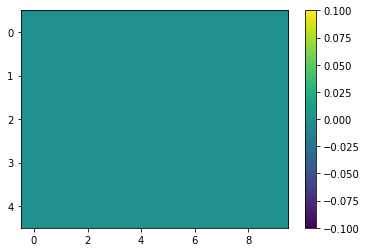

In [ ]:
problema_1a = np.zeros(shape=(5,10), dtype=bool)
mostrar(problema_1a)

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO ESPERADO @@@@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

### Item (b)

Considere há partículas em todos as posições $(i,j)$ para as quais $i$ é par e $j$ é ímpar, em que $i$ e $j$ são os **índices** da superfície, começando de 0. 

Faça com que essas posições na `ndarray` criada anteriormente tenham valor `True`. Utilize a função `mostrar()` para conferir o resultado.

**Não vale utilizar loops! Utilize indexação.**

[[False  True False  True False  True False  True False  True]
 [False False False False False False False False False False]
 [False  True False  True False  True False  True False  True]
 [False False False False False False False False False False]
 [False  True False  True False  True False  True False  True]]


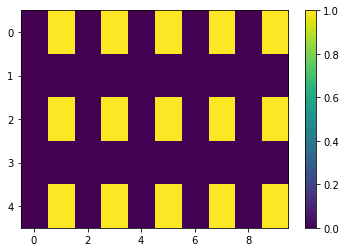

In [ ]:
problema_1b = np.zeros(shape=(5,10), dtype=bool)
problema_1b[0::2,1::2] = 1
mostrar(problema_1b)

[[False  True False  True False  True False  True False  True]
 [False False False False False False False False False False]
 [False  True False  True False  True False  True False  True]
 [False False False False False False False False False False]
 [False  True False  True False  True False  True False  True]]


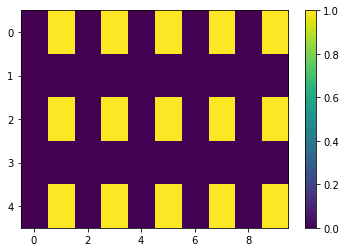

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO ESPERADO @@@@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

### Item (c) 

Agora vamos criar uma segunda `ndarray` com números aleatórios onde há partículas em `superficie`. Ela deve possuir o mesmo formato da matriz `superficie`.

Os números devem ser inteiros aleatórios entre 100 e 200 (incluindo o 200). Onde não há partículas deve possuir um valor igual a 0. Lembre-se que o gerador é acessado utilizando o objeto `rng.integers()`.

Há diferentes formas de fazer isso, escolha apenas uma delas e faça:

1. Podemos criar uma matriz totalmente aleatória e depois filtrá-la utilizando uma máscara como, por exemplo, `nova_matriz[~superficie] = 0` (o `~` serve para inverter `False` com `True` e vice-versa).

2. Podemos criar diretamente uma matriz aleatória utilizando o formato do subconjunto na qual `superficie` é `True`. Para isso, deve fazer uma cópia da superfície, alterar seu `dtype` para `int` e depois fazer `nova_matriz[superficie] = rng.integers(xxx,xxx,xxxx=True,size=(X,X))`.

Caso saiba alguma outra maneira, fique à vontade. Novamente, não vale utilizar loops.

[[  0 124   0 165   0 189   0 133   0 183]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 148   0 140   0 193   0 179   0 167]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 183   0 135   0 163   0 192   0 118]]


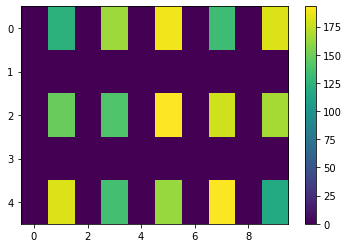

In [ ]:
problema_1c = rng.integers(100,201, (5,10))
problema_1c[~problema_1b] = 0

mostrar(problema_1c)

[[  0 173   0 154   0 127   0 116   0 197]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 192   0 103   0 153   0 146   0 106]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0 151   0 151   0 176   0 114   0 182]]


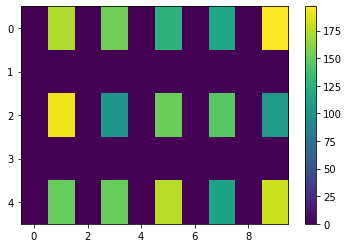

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

---

## Problema 2 

Vamos construir uma matriz que mostra o potencial elétrico de  partículas puntiformes em uma superfície bidimensional.

### Item (a)

Defina uma função `V` que recebe como argumentos a carga `q` em uma posição `x0` e `y0`, e as posições `x` e `y`. Neste caso, assumimos que a carga `q` está na posição `x0` e `y0`, e queremos calcular o potencial em `x` e `y`.

Vamos assumir a seguinte forma para o potencial na posição $\vec{r} = (x,y)$ devido a uma carga $q$ na posição $\vec{r}_0 = (x_0,y_0)$:

$$V(\vec{\mathcal{r}}) = \frac{q}{|\vec{r}-\vec{r}_0|}$$

*Dicas:*

- Caso utilize a função `sqrt`, utilize a do NumPy com `np.sqrt()`!
- Teste a função com `V(10,2,4,3,5)`, que deve retornar o valor `7.071067811865475`.

In [ ]:
### ESQUELETO ###

def V(q,x0,y0,x,y):
  denominador = xx.xxxx((x-x0)**2 + ...)
  return  /
V(10,2,4,3,5)

In [ ]:
def V(q,x0,y0,x,y):
  #cte = (np.pi)*4*(8.85)*10**(-12)
  denominador = (np.sqrt((x-x0)**2 + (y-y0)**2))
  return  q/denominador
V(10,2,4,3,5)

7.071067811865475

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO ESPERADO @@@@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

7.071067811865475

### Item (b)

Crie uma lista de partículas chamada `cargas` contendo **tuplas** `(q,x0,y0)`. Adicione 5 partículas com as seguintes cargas e posições:

- $q = 1$, em $(x_0,y_0) = (5,5)$
- $q = -1$, em $(x_0,y_0) = (-5,10)$
- $q = -1$, em $(x_0,y_0) = (0,0)$
- $q = 1$, em $(x_0,y_0) = (-5,-5)$
- $q = 5$, em $(x_0,y_0) = (15,-15)$

In [ ]:
#cargas = [(1,5,5),(-1,-5,10),(-1,0,0),(1,-5,-5),(5,15,-15)] # Se eu definisse direto assim, também seria certo?
cargas = []
cargas.append((1,5,5))
cargas.append((-1,-5,10))
cargas.append((-1,0,0))
cargas.append((1,-5,-5))
cargas.append((5,15,-15))
#print(cargas)

### Item (c) 

Agora vamos criar um sistema de coordenadas utilizando `np.meshgrid()`. As coordenadas $x$ e $y$ devem varrer o espaço entre $-20$ e $20$, com 500 pontos cada. Utilize a função `np.linspace()` para isso.

Depois, crie as variáveis `xc` e `yc` com `np.meshgrid(x,y)`.

In [ ]:
### ESQUELETO ###
x = xx.linspace( , , )
y = .(, ,)

xc, yc = xx.xxxgrid(  )

In [ ]:
x = np.linspace(-20,20,500)
y = np.linspace(-20,20,500)

xc, yc = np.meshgrid(x,y)

### Item (d)

Vamos agora calcular o potencial total devido às cinco cargas adicionadas anteriormente.

Para isso, faça um loop para cada `carga` em `cargas` e calcule o potencial resultante fornecendo as propriedades da carga e os eixos x e y dados pelo `np.meshgrid()`. Por exemplo, para calcular o potencial devido a cada carga utilizamos:

```python
for carga in cargas:
  potencial = V(*carga, x=xc, y=yc)
```

Crie uma `ndarray` vazia (com `np.zeros()`) chamada `potencial_total` de tamanho $500 \times 500$, ou seja, o mesmo *shape* de `xc` e `yc`. Repetindo o loop acima, calcule o potencial total e execute a função `mostrar_potencial(x,y,potencial_total)`.

In [ ]:
### ESQUELETO ###
potencial_total = xx.zerxxx(shape=)

for xxxx in xxxx:
  potencial_total += 

mostrar_potencial( )

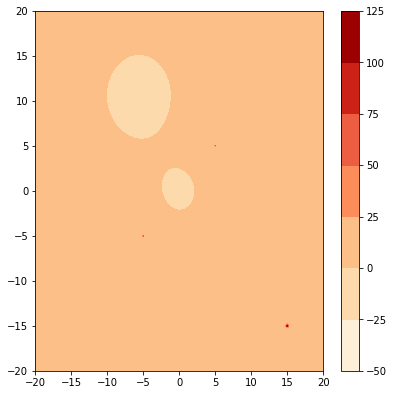

In [ ]:
potencial_total = np.zeros(shape=xc.shape)

for carga in cargas:
  potencial_total += V(*carga,x=xc,y=yc)

mostrar_potencial(x,y,potencial_total)

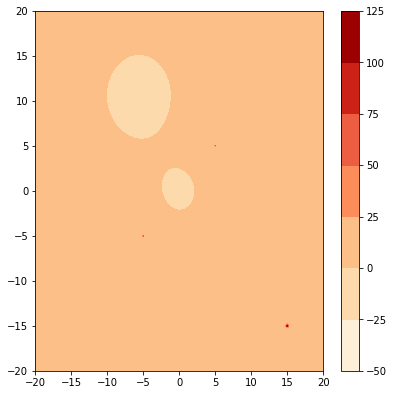

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO ESPERADO @@@@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

> *Bonus*: **(opcional!)**
> 
> Se tudo estiver certo, rode o seguinte código para ver os vetores de campo elétrico. Vamos fazer isso no próximo tópico.

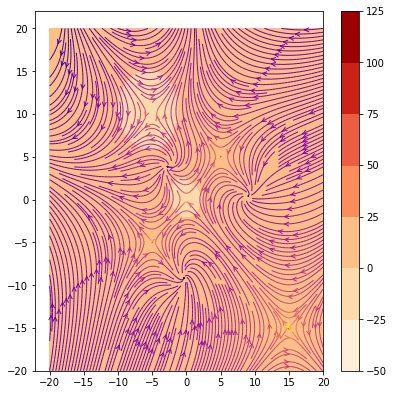

In [ ]:
Ex, Ey = np.gradient(potencial_total)
mostrar_potencial(x,y,potencial_total, Ex,Ey)

---

## Problema 3 

Vamos trabalhar com o SciPy, com os pacotes de constantes e com otimização.


### Item (a)

Utilizando o pacote `scipy.constants`, converta os seguintes valores para unidades SI:

- $-13.6$ eV
- $1.4$ atm
- $25$ pés
- $50$ polegadas 
- $25$ km/h
- $800$ nm
- $100$ hp (cavalos)
- $c/5$ (velocidade)
- $30$ hectares
- $1000$ calorias

Não vale utilizar transformação direta! Deve usar os valores constantes definidos no pacote.

In [ ]:
import scipy.constants as spcte

In [ ]:
joule = spcte.physical_constants['electron volt-joule relationship']
print(f'{-13.6*joule[0]} {joule[1]}')
print(f'{1.4*spcte.atm} Pa')
print(f'{25*spcte.foot:.3f} m')
print(f'{50*spcte.inch:.3f} cm')
print(f'{25*spcte.kmh:.3f} m/s')
print(f'{800*spcte.nano} m')
print(f'{100*spcte.hp:.3f} W')
print(f'{(1/5)*spcte.c} m/s')
print(f'{30*spcte.hectare} m²')
print(f'{1000*spcte.calorie} J')



-2.1789602222399996e-18 J
141855.0 Pa
7.620 m
1.270 cm
6.944 m/s
8.000000000000001e-07 m
74569.987 W
59958491.6 m/s
300000.0 m²
4184.0 J


In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

-2.1789602222399996e-18
141855.0
7.619999999999999
1.27
6.944444444444445
8.000000000000001e-07
74569.98715822701
59958491.6
300000.0
4184.0


### Item (b)

Lá na Física 2 vimos que podemos calcular as posições dos máximos de intensidade no fenômeno de difração por fenda simples em um ângulo $\beta$ dado aproximadamente por

$$\beta \approx (2m+1)\pi,\qquad\qquad (m = 0,1,2,\ldots)$$

onde

$$\beta = \frac{2\pi}{\lambda}a\sin\theta.$$

No entanto, pelo fato da equação para a intensidade ter um fator $(\beta/2)^2$, essa expressão não é totalmente correta. De fato, não existe o máximo esperado em $\beta = \pi$, aparecendo o primeiro pico em $\beta \approx 2.86\pi \approx 8.98$, e não em $3\pi\approx 9.42$.

A equação para a intensidade é:

$$I/I_0 = \left[\frac{\sin(\beta/2)}{\beta/2}\right]^2.$$

Utilize o pacote `optimize` do SciPy para encontrar as posições $\beta > 0$ dos quatro primeiros máximos da função (incluindo o central):

*Dicas*:

- Use como chute os valores $\pi,3\pi,\ldots$, etc.
- Como o pacote irá minimizar a função, faça a multiplicação dela por -1.
- O resultado terá `success=True` se conseguiu achar um valor mínimo. O resultado é acessível por `x`.
- Utilize a função `sin` do pacote NumPy, e não do pacote `math`!
- O NumPy já fornece a variável `pi` com `np.pi`.

Resultado esperado:

`[6.489986289492933e-07, 8.986821068497147, 15.450533833611264, 21.80613565740807]`

Note que não há máximo em $\beta \approx \pi$.

In [ ]:
import scipy.optimize as spopt

In [ ]:
### ESQUELETO ###
f = lambda x: - (np.        )

maximos = []
for ... in range(...):
  res = spopt.minimize
  if res.success:
    xxx.append(res.x[0])



In [ ]:
f = lambda x: -1*(np.sin(x/2)/(x/2))**(2)
maximos = []
for i in range(0,4):
  res = spopt.minimize(f, (2*i+1)*np.pi)
  if res.success:
    maximos.append(res.x[0])
print(maximos)

#Teria como eu plotar esse gráfico de baixo a partir desse codigo que implementei?

[6.489986289492933e-07, 8.986821068497147, 15.450533833611264, 21.80613565740807]


Text(0.5, 0, '$\\beta$')

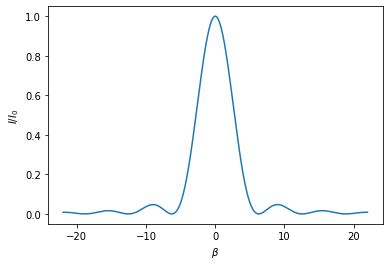

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ GRÁFICO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)
#(aqui mostro mais de 4 valores, apenas para referência)

[6.489986289492933e-07, 8.986821068497147, 15.450533833611264, 21.80613565740807, 28.13209218086562, 34.441154626697035, 40.7425622321166, 47.03867818693572, 53.33208181652255, 59.6231564500865, 65.91273361158096, 72.20120173490872, 78.49327476050044, 84.8051086886482, 91.09174656138882]
0.00π 2.86π 4.92π 6.94π 8.95π 10.96π 12.97π 14.97π 16.98π 18.98π 20.98π 22.98π 24.99π 26.99π 29.00π


---

## Problema 4

Vamos trabalhar com integração numérica utilizando o SciPy.

### Item (a)

Encontre a área de $f(x) = x^2 + 2\sin(5x) + 10$, para $0 < x < 10$, utilizando o pacote `integrate` do SciPy.

Compare o resultado com o valor esperado,

$$\int f(x)dx = \frac{x^{3}}{3} + 10 x - \frac{2 \cos{\left(5 x \right)}}{5} + C$$

In [ ]:
import scipy.integrate as spint 

In [ ]:
f = lambda x: x**2 + 2*np.sin(5*x) + 10
resultado = spint.quad(f, 0, 10)
print(f' O resultado da integral é {resultado[0]} com o erro estimado de {resultado[1]}')

 O resultado da integral é 433.3473469219365 com o erro estimado de 2.74883837914075e-10


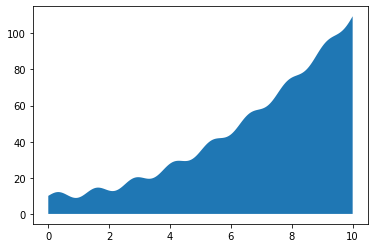

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ GRÁFICO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

Valor da integral numérica = 433.3473469219365, com erro estimado de 2.74883837914075e-10.
Valor esperado: 432.94734692193646.


### Item (b)

Calcule a integral tripla dada por 

$$\int_0^2 \int_0^{3-\frac{3}{2}x}\int_0^{6-3x-2y}(1-x)dzdydx$$

O valor esperado é $3$.

*Dica*: A função `tplquad` assume a função como sendo f(z,y,x), na ordem invertida! Os intervalos são dados na ordem: variação em x constante, variação em y como uma função de x, e variação em z como uma função de x e y.

In [ ]:
f = lambda z,y,x: 1-x
x0,xf = 0, 2

y0,yf = lambda x: 0, lambda x: 3 - (3/2)*x

z0,zf = lambda x,y: 0,lambda x,y: 6-(3*x)- 2*y

resultado = spint.tplquad(f,x0,xf,y0,yf,z0,zf)
print(f'Resultado da integral é {resultado[0]}')

Resultado da integral é 3.0


In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@ RESULTADO DE REFERÊNCIA @@@@@@@@@@@@@@@@@@@@@@@@#
#(não execute esta célula, caso contrário o resultado a seguir desaparece)

(3.0, 9.905455264686065e-14)

---

Envie o esta atividade no Google Classroom para que seja avaliada até a data limite.